In [1]:
pip install scipy xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sst
import math
from math import log

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.tsa.stattools import adfuller
from patsy import PatsyError

from statsmodels.formula.api import ols
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt

In [3]:
Ch15data = pd.read_excel('/Users/jennifer/Desktop/Baruch F21/ECO 9723 Econometrics/Hw11:10/us_macro_quarterly copy.xlsx')
Ch15data

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL
0,1955-01-01,2683.766,NaN,15.755,26.793333
1,1955-04-01,2727.452,NaN,15.771,26.756667
2,1955-07-01,2764.128,NaN,15.834,26.776667
3,1955-10-01,2780.762,NaN,15.878,26.856667
4,1956-01-01,2770.032,NaN,15.943,26.860000
...,...,...,...,...,...
247,2016-10-01,16851.420,99.125073,111.583,242.177333
248,2017-01-01,16903.240,99.291726,112.198,243.949000
249,2017-04-01,17031.085,101.324890,112.273,244.010000
250,2017-07-01,17163.894,101.724856,112.699,245.296667


In [4]:
import os
os.getcwd()

'/Users/jennifer/Desktop/Baruch F21/ECO 9723 Econometrics/Hw11:10'

In [5]:
#a
#i.
Ch15data['l1_PCECTPI'] = Ch15data['PCECTPI'].shift(1)
Ch15data['Infl']=400*(np.log(Ch15data['PCECTPI'])-np.log(Ch15data['l1_PCECTPI']))
Ch15data

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl
0,1955-01-01,2683.766,NaN,15.755,26.793333,NaN,NaN
1,1955-04-01,2727.452,NaN,15.771,26.756667,15.755,0.406014
2,1955-07-01,2764.128,NaN,15.834,26.776667,15.771,1.594686
3,1955-10-01,2780.762,NaN,15.878,26.856667,15.834,1.109991
4,1956-01-01,2770.032,NaN,15.943,26.860000,15.878,1.634143
...,...,...,...,...,...,...,...
247,2016-10-01,16851.420,99.125073,111.583,242.177333,111.034,1.972899
248,2017-01-01,16903.240,99.291726,112.198,243.949000,111.583,2.198584
249,2017-04-01,17031.085,101.324890,112.273,244.010000,112.198,0.267295
250,2017-07-01,17163.894,101.724856,112.699,245.296667,112.273,1.514857


In [6]:
Ch15data[(Ch15data.freq == '1963-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl
32,1963-01-01,3456.08,17.238516,18.069,30.476667,18.018,1.130602


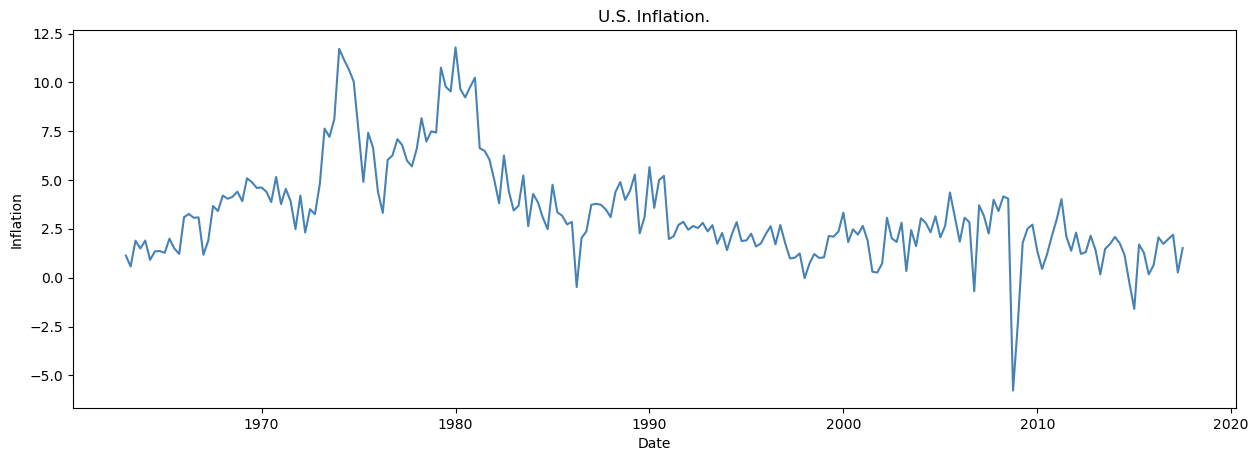

In [7]:
#ii.
def plot_df(Ch15data, x, y, title="U.S. Inflation", xlabel='Date', ylabel='Inflation', dpi=100):
    plt.figure(figsize=(15,5), dpi=dpi)
    plt.plot(x, y, color='steelblue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
     
plot_df(Ch15data, x=Ch15data.freq[32:251], y=Ch15data.Infl[32:251], title='U.S. Inflation.')

In [8]:
#b
#i.
Ch15data['dinfl'] = Ch15data['Infl']- Ch15data['Infl'].shift(1)
Ch15data

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl
0,1955-01-01,2683.766,NaN,15.755,26.793333,NaN,NaN,NaN
1,1955-04-01,2727.452,NaN,15.771,26.756667,15.755,0.406014,NaN
2,1955-07-01,2764.128,NaN,15.834,26.776667,15.771,1.594686,1.188672
3,1955-10-01,2780.762,NaN,15.878,26.856667,15.834,1.109991,-0.484696
4,1956-01-01,2770.032,NaN,15.943,26.860000,15.878,1.634143,0.524153
...,...,...,...,...,...,...,...,...
247,2016-10-01,16851.420,99.125073,111.583,242.177333,111.034,1.972899,0.243569
248,2017-01-01,16903.240,99.291726,112.198,243.949000,111.583,2.198584,0.225684
249,2017-04-01,17031.085,101.324890,112.273,244.010000,112.198,0.267295,-1.931288
250,2017-07-01,17163.894,101.724856,112.699,245.296667,112.273,1.514857,1.247562


In [9]:
sm.tsa.acf(Ch15data['dinfl'][32:251], nlags=4)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.24972073, -0.19938072,  0.13602592, -0.08581162])

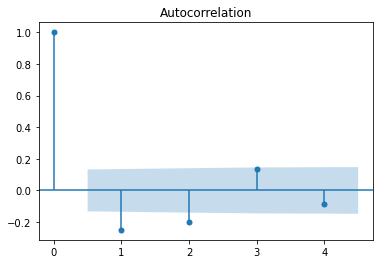

In [10]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(Ch15data['dinfl'][32:251], lags=4)
plt.show()

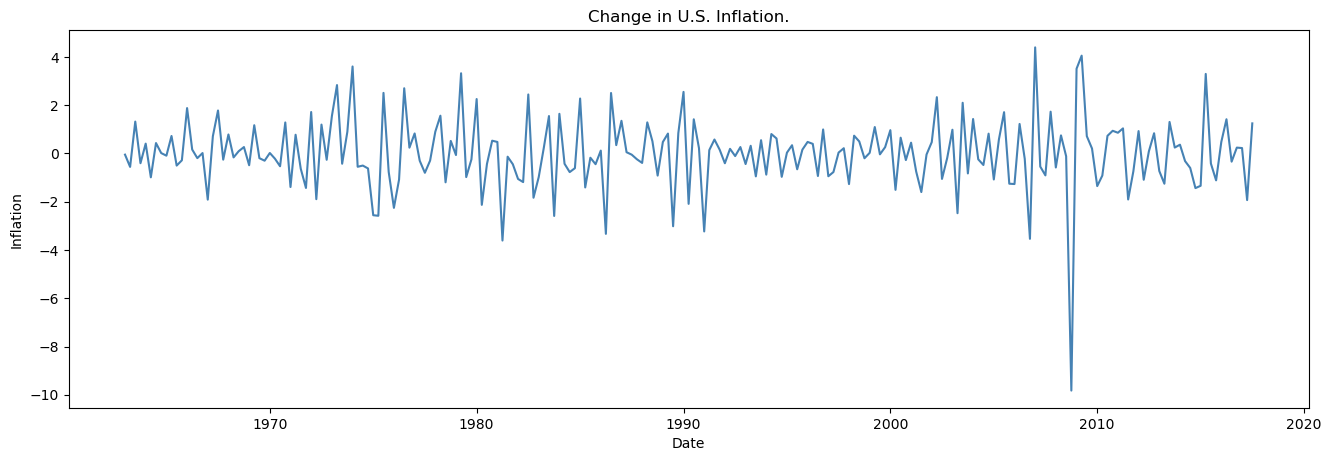

In [11]:
#ii.
def plot_df(Ch15data, x, y, title="Change in U.S. Inflation", xlabel='Date', ylabel='Inflation', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='steelblue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
     
plot_df(Ch15data, x=Ch15data.freq[32:251], y=Ch15data.dinfl[32:251], title='Change in U.S. Inflation.')

In [12]:
#c
#i.
Ch15data['d1infl'] = Ch15data['dinfl'].shift(1)

In [13]:
lm1=smf.ols(formula='dinfl~d1infl',data=Ch15data[32:251])
results1 = lm1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     14.48
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           0.000184
Time:                        22:08:37   Log-Likelihood:                -389.32
No. Observations:                 219   AIC:                             782.6
Df Residuals:                     217   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.097      0.007      0.995      -0.191       0.192
d1infl        -0.2505      0.066     -3.806      0.000      -0.380      -0.121
==============================================================================
Omnibus:                       91.884   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              984.744
Skew:                          -1.290   Prob(JB):                    1.46e-214
Kurtosis:                      13.063   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#ii.
Ch15data['d2infl'] = Ch15data['d1infl'].shift(1)

In [15]:
lm2=smf.ols(formula='dinfl~d1infl+d2infl',data=Ch15data[32:251])
results2 = lm2.fit() 
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     16.97
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           1.43e-07
Time:                        22:08:37   Log-Likelihood:                -380.41
No. Observations:                 219   AIC:                             766.8
Df Residuals:                     216   BIC:                             777.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.094      0.015      0.988      -0.183       0.186
d1infl        -0.3195      0.065     -4.887      0.000      -0.448      -0.191
d2infl        -0.2807      0.066     -4.278      0.000      -0.410      -0.151
==============================================================================
Omnibus:                      104.044   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.322
Skew:                          -1.539   Prob(JB):                    1.74e-237
Kurtosis:                      13.489   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#iii.
def calculate_bic(T, ssr, num_params):
 bic =log(ssr/T) + num_params * log(T)/T
 return bic

In [17]:
Ch15data['d3infl'] = Ch15data['d2infl'].shift(1)
Ch15data['d4infl'] = Ch15data['d3infl'].shift(1)
Ch15data['d5infl'] = Ch15data['d4infl'].shift(1)
Ch15data['d6infl'] = Ch15data['d5infl'].shift(1)
Ch15data['d7infl'] = Ch15data['d6infl'].shift(1)
Ch15data['d8infl'] = Ch15data['d7infl'].shift(1)

In [18]:
lm_1=smf.ols(formula='dinfl~d1infl',data=Ch15data[32:251])
results_1 = lm_1.fit()
ssr_1=results_1.ssr
num_params_1 = len(results_1.params)
num_params_1
N_1=len(results_1.fittedvalues)

lm_2=smf.ols(formula='dinfl~d1infl+d2infl',data=Ch15data[32:251])
results_2 = lm_2.fit()
ssr_2=results_2.ssr
num_params_2 = len(results_2.params)
N_2=len(results_2.fittedvalues)

lm_3=smf.ols(formula='dinfl~d1infl+d2infl+d3infl',data=Ch15data[32:251])
results_3 = lm_3.fit()
ssr_3=results_3.ssr
num_params_3= len(results_3.params)
N_3=len(results_3.fittedvalues)

lm_4=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl',data=Ch15data[32:251])
results_4 = lm_4.fit()
ssr_4=results_4.ssr
num_params_4 = len(results_4.params)
N_4=len(results_4.fittedvalues)

lm_5=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl',data=Ch15data[32:251])
results_5 = lm_5.fit()
ssr_5=results_5.ssr
num_params_5 = len(results_5.params)
N_5=len(results_5.fittedvalues)

lm_6=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl',data=Ch15data[32:251])
results_6 = lm_6.fit()
ssr_6=results_6.ssr
num_params_6 = len(results_6.params)
N_6=len(results_6.fittedvalues)

lm_7=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl+d7infl',data=Ch15data[32:251])
results_7 = lm_7.fit()
ssr_7=results_7.ssr
num_params_7 = len(results_7.params)
N_7=len(results_7.fittedvalues)

lm_8=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl+d7infl+d8infl',data=Ch15data[32:251])
results_8 = lm_8.fit()
ssr_8=results_8.ssr
num_params_8 = len(results_8.params)
N_8=len(results_8.fittedvalues)

In [19]:
bic1 = calculate_bic(N_1, ssr_1, num_params_1)
bic2 = calculate_bic(N_2, ssr_2, num_params_2)
bic3 = calculate_bic(N_3, ssr_3, num_params_3)
bic4 = calculate_bic(N_4, ssr_4, num_params_4)
bic5 = calculate_bic(N_5, ssr_5, num_params_5)
bic6 = calculate_bic(N_6, ssr_6, num_params_6)
bic7= calculate_bic(N_7, ssr_7, num_params_7)
bic8= calculate_bic(N_8, ssr_8, num_params_8)
print('BIC: %.3f' % bic1, '%.3f' % bic2,'%.3f' % bic3,'%.3f' % bic4,'%.3f' % bic5,'%.3f' % bic6,'%.3f' % bic7,'%.3f' % bic8)

BIC: 0.767 0.710 0.735 0.746 0.756 0.772 0.796 0.820


In [20]:
def calculate_aic(T, ssr, num_params):
 aic =log(ssr/T) + num_params * 2/T
 return aic

In [21]:
print('Both AIC and BIC chooses p=2 lag.')

Both AIC and BIC chooses p=2 lag.


In [22]:
lm_2=smf.ols(formula='dinfl~d1infl+d2infl',data=Ch15data[32:251])
results_2 = lm_2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     16.97
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           1.43e-07
Time:                        22:08:38   Log-Likelihood:                -380.41
No. Observations:                 219   AIC:                             766.8
Df Residuals:                     216   BIC:                             777.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.094      0.015      0.988      -0.183       0.186
d1infl        -0.3195      0.065     -4.887      0.000      -0.448      -0.191
d2infl        -0.2807      0.066     -4.278      0.000      -0.410      -0.151
==============================================================================
Omnibus:                      104.044   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.322
Skew:                          -1.539   Prob(JB):                    1.74e-237
Kurtosis:                      13.489   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
Ch15data[(Ch15data.freq == '2017-10-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl
251,2017-10-01,17271.702,103.491376,113.458,247.301333,112.699,2.684871,1.170014,1.247562,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591


In [24]:
Ch15data[(Ch15data.freq == '2017-07-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl
250,2017-07-01,17163.894,101.724856,112.699,245.296667,112.273,1.514857,1.247562,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115


In [25]:
#iv.
DeltInfl20181=results2.params[0]+results2.params[1]*Ch15data.dinfl[251]+results2.params[2]*Ch15data.dinfl[250]
DeltInfl20181
print(f'The predicted change in inflation is {DeltInfl20181:.2f}')

The predicted change in inflation is -0.72


In [26]:
#v.
Infl20181=DeltInfl20181+Ch15data.Infl[251]
Infl20181
print(f'The predicted level of inflation is {Infl20181:.2f}')

The predicted level of inflation is 1.96


In [27]:
#d
#i.
Ch15data['l1infl'] = Ch15data['Infl'].shift(1)
lm_ADF=smf.ols(formula='dinfl~l1infl+d1infl+d2infl',data=Ch15data[32:251])
results_ADF = lm_ADF.fit()
results_ADF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     14.08
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.07e-08
Time:                        22:08:38   Log-Likelihood:                -376.76
No. Observations:                 219   AIC:                             761.5
Df Residuals:                     215   BIC:                             775.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3514      0.159      2.210      0.028       0.038       0.665
l1infl        -0.1045      0.039     -2.701      0.007      -0.181      -0.028
d1infl        -0.2565      0.069     -3.743      0.000      -0.392      -0.121
d2infl        -0.2390      0.067     -3.594      0.000      -0.370      -0.108
==============================================================================
Omnibus:                      101.933   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1196.380
Skew:                          -1.455   Prob(JB):                    1.62e-260
Kurtosis:                      14.075   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
result = adfuller(Ch15data['Infl'][32:251], autolag='AIC')
result

(-2.676517293479712,
 0.07819069558201754,
 2,
 216,
 {'1%': -3.4609922013325267,
  '5%': -2.875015740963014,
  '10%': -2.5739524288408777},
 718.6007648187015)

In [29]:
print('Reject null hypothesis at 10% level.')

Reject null hypothesis at 10% level.


In [30]:
#ii
print('Yes, the inflation rate does not exhibit a linear trend, so that the specification that includes an') 
print('intercept but no time trend is appropriate.')

Yes, the inflation rate does not exhibit a linear trend, so that the specification that includes an
intercept but no time trend is appropriate.


In [31]:
#iii.
print('Both AIC and BIC chooses p=2 lag.')

Both AIC and BIC chooses p=2 lag.


In [32]:
#iv.
print('AR for Infl contain an autoregressive root close to 1.0. Given the null hypothesis cannot be reject at 5%')
print('and the estimate, this suggests that the true value is close to 1.0.')

AR for Infl contain an autoregressive root close to 1.0. Given the null hypothesis cannot be reject at 5%
and the estimate, this suggests that the true value is close to 1.0.


In [33]:
Ch15data

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl
0,1955-01-01,2683.766,NaN,15.755,26.793333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955-04-01,2727.452,NaN,15.771,26.756667,15.755,0.406014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955-07-01,2764.128,NaN,15.834,26.776667,15.771,1.594686,1.188672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406014
3,1955-10-01,2780.762,NaN,15.878,26.856667,15.834,1.109991,-0.484696,1.188672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.594686
4,1956-01-01,2770.032,NaN,15.943,26.860000,15.878,1.634143,0.524153,-0.484696,1.188672,NaN,NaN,NaN,NaN,NaN,NaN,1.109991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2016-10-01,16851.420,99.125073,111.583,242.177333,111.034,1.972899,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115,3.297548,-1.338035,-1.434338,1.729330
248,2017-01-01,16903.240,99.291726,112.198,243.949000,111.583,2.198584,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115,3.297548,-1.338035,1.972899
249,2017-04-01,17031.085,101.324890,112.273,244.010000,112.198,0.267295,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115,3.297548,2.198584
250,2017-07-01,17163.894,101.724856,112.699,245.296667,112.273,1.514857,1.247562,-1.931288,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115,0.267295


In [34]:
year_qrt_full=np.linspace(1955,2017.75,252)
print(year_qrt_full)

[1955.   1955.25 1955.5  1955.75 1956.   1956.25 1956.5  1956.75 1957.
 1957.25 1957.5  1957.75 1958.   1958.25 1958.5  1958.75 1959.   1959.25
 1959.5  1959.75 1960.   1960.25 1960.5  1960.75 1961.   1961.25 1961.5
 1961.75 1962.   1962.25 1962.5  1962.75 1963.   1963.25 1963.5  1963.75
 1964.   1964.25 1964.5  1964.75 1965.   1965.25 1965.5  1965.75 1966.
 1966.25 1966.5  1966.75 1967.   1967.25 1967.5  1967.75 1968.   1968.25
 1968.5  1968.75 1969.   1969.25 1969.5  1969.75 1970.   1970.25 1970.5
 1970.75 1971.   1971.25 1971.5  1971.75 1972.   1972.25 1972.5  1972.75
 1973.   1973.25 1973.5  1973.75 1974.   1974.25 1974.5  1974.75 1975.
 1975.25 1975.5  1975.75 1976.   1976.25 1976.5  1976.75 1977.   1977.25
 1977.5  1977.75 1978.   1978.25 1978.5  1978.75 1979.   1979.25 1979.5
 1979.75 1980.   1980.25 1980.5  1980.75 1981.   1981.25 1981.5  1981.75
 1982.   1982.25 1982.5  1982.75 1983.   1983.25 1983.5  1983.75 1984.
 1984.25 1984.5  1984.75 1985.   1985.25 1985.5  1985.75 1986.

In [35]:
tau=np.linspace(1967,2013.75,188)
print(tau)
tau[0]
tau[187]

[1967.   1967.25 1967.5  1967.75 1968.   1968.25 1968.5  1968.75 1969.
 1969.25 1969.5  1969.75 1970.   1970.25 1970.5  1970.75 1971.   1971.25
 1971.5  1971.75 1972.   1972.25 1972.5  1972.75 1973.   1973.25 1973.5
 1973.75 1974.   1974.25 1974.5  1974.75 1975.   1975.25 1975.5  1975.75
 1976.   1976.25 1976.5  1976.75 1977.   1977.25 1977.5  1977.75 1978.
 1978.25 1978.5  1978.75 1979.   1979.25 1979.5  1979.75 1980.   1980.25
 1980.5  1980.75 1981.   1981.25 1981.5  1981.75 1982.   1982.25 1982.5
 1982.75 1983.   1983.25 1983.5  1983.75 1984.   1984.25 1984.5  1984.75
 1985.   1985.25 1985.5  1985.75 1986.   1986.25 1986.5  1986.75 1987.
 1987.25 1987.5  1987.75 1988.   1988.25 1988.5  1988.75 1989.   1989.25
 1989.5  1989.75 1990.   1990.25 1990.5  1990.75 1991.   1991.25 1991.5
 1991.75 1992.   1992.25 1992.5  1992.75 1993.   1993.25 1993.5  1993.75
 1994.   1994.25 1994.5  1994.75 1995.   1995.25 1995.5  1995.75 1996.
 1996.25 1996.5  1996.75 1997.   1997.25 1997.5  1997.75 1998.

2013.75

In [36]:
for i in range(0, len(tau)):
    dummy1 =pd.DataFrame({"D" + str(i) : np.where(year_qrt_full<tau[i],0,1)})
    dummy1["D" + str(i)] = dummy1["D" + str(i)].astype('float64')
    Ch15data = pd.concat([Ch15data,dummy1["D" + str(i)]], axis = 1)
    Ch15data["D_d1infl" + str(i)]=dummy1["D" + str(i)]*Ch15data['d1infl']
    Ch15data["D_d2infl" + str(i)]=dummy1["D" + str(i)]*Ch15data['d2infl']

    Ch15data_new=Ch15data[32:252]

In [37]:
Ch15data_new
pd.set_option('display.max_columns', 207)
#print(Ch15data_new)

In [38]:
ssr=np.zeros(len(tau))
for i in range(0, len(tau)):
    x1=Ch15data_new["d1infl"]
    x2=Ch15data_new["d2infl"]
    x3=Ch15data_new["D" + str(i)]
    x4=Ch15data_new["D_d1infl" + str(i)]
    x5=Ch15data_new["D_d2infl" + str(i)]
    y=Ch15data_new["dinfl"]
    DATA=pd.concat([x1,x2,x3,x4,x5,y], axis = 1)
    OLS=smf.ols(formula='y~x1+x2+x3+x4+x5',data=DATA)
    results_OLS = OLS.fit()
    ssr[i]=results_OLS.ssr

In [39]:
F_stat=np.zeros(len(tau))
for i in range(0, len(tau)):
    x1=Ch15data_new["d1infl"]
    x2=Ch15data_new["d2infl"]
    x3=Ch15data_new["D" + str(i)]
    x4=Ch15data_new["D_d1infl" + str(i)]
    x5=Ch15data_new["D_d2infl" + str(i)]
    y=Ch15data_new["dinfl"]
    DATA=pd.concat([x1,x2,x3,x4,x5,y], axis = 1)
    DATA=pd.DataFrame(DATA)
    OLS=smf.ols(formula='y~x1+x2+x3+x4+x5',data=DATA)
    results_OLS = OLS.fit(cov_type='HC1')
    results_OLS.summary()
    hypotheses ='(x3 = 0), (x4 = 0), (x5 = 0)'
    F=results_OLS.f_test(hypotheses)
    dir(F)
    F_stat[i]=F.fvalue
    #F.pvalue
    #F_final=F[0]
    #print(F_final)

In [40]:
F_stat

array([0.88306484, 0.65847291, 0.69039528, 0.23049421, 0.23240925,
       0.53590743, 0.52413385, 0.5820422 , 0.61865545, 0.50313401,
       0.73535402, 0.73338   , 0.66946141, 0.62889755, 0.57007574,
       0.44240027, 0.59778466, 0.64712441, 0.97799109, 1.1019668 ,
       0.42086043, 0.71704209, 1.14105409, 1.80717596, 1.96734766,
       2.44721316, 1.82168762, 2.09173156, 3.18893082, 3.47580097,
       3.7666022 , 3.14084677, 3.08992615, 3.0747587 , 3.40405555,
       2.23457648, 2.3402542 , 1.24978892, 1.50143689, 1.13990884,
       1.30257753, 1.70247184, 1.68806388, 1.5827478 , 1.57818515,
       1.58714549, 1.83180808, 1.62643481, 1.6709078 , 1.65548862,
       2.06039325, 1.99964753, 2.03043671, 2.09918512, 1.66822088,
       1.57623301, 1.58201772, 1.63044229, 1.0835708 , 1.20744221,
       1.41182559, 1.39853813, 1.49726882, 1.28971505, 1.1542494 ,
       1.04914744, 1.12536047, 1.09996606, 0.83500934, 0.85945552,
       0.92897436, 0.85841196, 0.90026966, 0.79023581, 0.76148

In [41]:
#e
QLR=max(F_stat)
QLR
print(f'The QLR statistics is {QLR:.2f}')

The QLR statistics is 5.12


In [42]:
np.where(F_stat==QLR)

(array([169]),)

In [43]:
tau[169]

2009.25

In [44]:
F_stat_Data=pd.DataFrame(F_stat)
F_stat_Data
len(F_stat_Data)

188

In [45]:
Ch15data_new.freq
pd.set_option('display.max_rows', 251)
#print(Ch15data_new.freq)

In [46]:
Ch15data_Updated=Ch15data_new[16:204]
#Ch15data_Updated

In [47]:
Ch15data_Updated_F_stat_mat=np.asmatrix(F_stat_Data)
#Ch15data_Updated_F_stat_mat
Ch15data_Updated_F_stat_mat=np.transpose(Ch15data_Updated_F_stat_mat)
#Ch15data_Updated_F_stat_mat

In [48]:
Ch15data_Updated_tau_mat=np.asmatrix(tau)
#Ch15data_Updated_tau_mat

In [49]:
Ch15data_graph=np.concatenate((Ch15data_Updated_tau_mat, Ch15data_Updated_F_stat_mat))
Ch15data_graph
Ch15data_graph=np.transpose(Ch15data_graph)
Ch15data_graph
Ch15data_graph_data=pd.DataFrame(Ch15data_graph)
#print(Ch15data_graph_data)
Time=Ch15data_graph_data[0]
F_statistics=Ch15data_graph_data[1]

In [50]:
graph_data=pd.concat([Time,F_statistics], axis = 1)
graph_data=pd.DataFrame(graph_data)
graph_data=graph_data.rename({0: 'Time'}, axis=1)
graph_data=graph_data.rename({1: 'F_stat'}, axis=1)
#graph_data

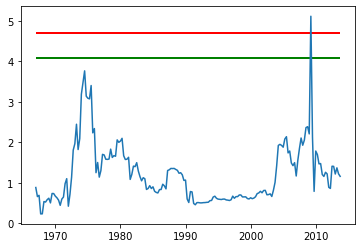

In [51]:
fig, gr = plt.subplots()
gr.plot(graph_data.Time, graph_data.F_stat)
gr.hlines(y=4.71,linewidth=2, xmin=1967.00, xmax=2013.75, color='r')
gr.hlines(y=4.09,linewidth=2, xmin=1967.00, xmax=2013.75, color='green')
plt.show()

In [52]:
(2017.75-2003)/0.25+1

60.0

In [53]:
Ch15data[(Ch15data.freq == '1963-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,D0,D_d1infl0,D_d2infl0,D1,D_d1infl1,D_d2infl1,D2,D_d1infl2,D_d2infl2,D3,D_d1infl3,D_d2infl3,D4,D_d1infl4,D_d2infl4,D5,D_d1infl5,D_d2infl5,D6,D_d1infl6,D_d2infl6,D7,D_d1infl7,D_d2infl7,D8,D_d1infl8,D_d2infl8,D9,D_d1infl9,D_d2infl9,D10,D_d1infl10,D_d2infl10,D11,D_d1infl11,D_d2infl11,D12,D_d1infl12,D_d2infl12,D13,D_d1infl13,D_d2infl13,D14,D_d1infl14,D_d2infl14,D15,D_d1infl15,D_d2infl15,D16,D_d1infl16,D_d2infl16,D17,D_d1infl17,D_d2infl17,D18,D_d1infl18,D_d2infl18,D19,D_d1infl19,D_d2infl19,D20,D_d1infl20,D_d2infl20,D21,D_d1infl21,D_d2infl21,D22,D_d1infl22,D_d2infl22,D23,D_d1infl23,D_d2infl23,D24,D_d1infl24,D_d2infl24,D25,D_d1infl25,D_d2infl25,D26,D_d1infl26,D_d2infl26,D27,D_d1infl27,D_d2infl27,D28,D_d1infl28,...,D_d2infl153,D154,D_d1infl154,D_d2infl154,D155,D_d1infl155,D_d2infl155,D156,D_d1infl156,D_d2infl156,D157,D_d1infl157,D_d2infl157,D158,D_d1infl158,D_d2infl158,D159,D_d1infl159,D_d2infl159,D160,D_d1infl160,D_d2infl160,D161,D_d1infl161,D_d2infl161,D162,D_d1infl162,D_d2infl162,D163,D_d1infl163,D_d2infl163,D164,D_d1infl164,D_d2infl164,D165,D_d1infl165,D_d2infl165,D166,D_d1infl166,D_d2infl166,D167,D_d1infl167,D_d2infl167,D168,D_d1infl168,D_d2infl168,D169,D_d1infl169,D_d2infl169,D170,D_d1infl170,D_d2infl170,D171,D_d1infl171,D_d2infl171,D172,D_d1infl172,D_d2infl172,D173,D_d1infl173,D_d2infl173,D174,D_d1infl174,D_d2infl174,D175,D_d1infl175,D_d2infl175,D176,D_d1infl176,D_d2infl176,D177,D_d1infl177,D_d2infl177,D178,D_d1infl178,D_d2infl178,D179,D_d1infl179,D_d2infl179,D180,D_d1infl180,D_d2infl180,D181,D_d1infl181,D_d2infl181,D182,D_d1infl182,D_d2infl182,D183,D_d1infl183,D_d2infl183,D184,D_d1infl184,D_d2infl184,D185,D_d1infl185,D_d2infl185,D186,D_d1infl186,D_d2infl186,D187,D_d1infl187,D_d2infl187
32,1963-01-01,3456.08,17.238516,18.069,30.476667,18.018,1.130602,-0.047733,0.130485,-0.338633,-0.387157,1.323367,-1.016625,1.512113,-0.791928,-1.023805,1.178335,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0


In [54]:
Ch15data[(Ch15data.freq == '2017-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,D0,D_d1infl0,D_d2infl0,D1,D_d1infl1,D_d2infl1,D2,D_d1infl2,D_d2infl2,D3,D_d1infl3,D_d2infl3,D4,D_d1infl4,D_d2infl4,D5,D_d1infl5,D_d2infl5,D6,D_d1infl6,D_d2infl6,D7,D_d1infl7,D_d2infl7,D8,D_d1infl8,D_d2infl8,D9,D_d1infl9,D_d2infl9,D10,D_d1infl10,D_d2infl10,D11,D_d1infl11,D_d2infl11,D12,D_d1infl12,D_d2infl12,D13,D_d1infl13,D_d2infl13,D14,D_d1infl14,D_d2infl14,D15,D_d1infl15,D_d2infl15,D16,D_d1infl16,D_d2infl16,D17,D_d1infl17,D_d2infl17,D18,D_d1infl18,D_d2infl18,D19,D_d1infl19,D_d2infl19,D20,D_d1infl20,D_d2infl20,D21,D_d1infl21,D_d2infl21,D22,D_d1infl22,D_d2infl22,D23,D_d1infl23,D_d2infl23,D24,D_d1infl24,D_d2infl24,D25,D_d1infl25,D_d2infl25,D26,D_d1infl26,D_d2infl26,D27,D_d1infl27,D_d2infl27,D28,D_d1infl28,...,D_d2infl153,D154,D_d1infl154,D_d2infl154,D155,D_d1infl155,D_d2infl155,D156,D_d1infl156,D_d2infl156,D157,D_d1infl157,D_d2infl157,D158,D_d1infl158,D_d2infl158,D159,D_d1infl159,D_d2infl159,D160,D_d1infl160,D_d2infl160,D161,D_d1infl161,D_d2infl161,D162,D_d1infl162,D_d2infl162,D163,D_d1infl163,D_d2infl163,D164,D_d1infl164,D_d2infl164,D165,D_d1infl165,D_d2infl165,D166,D_d1infl166,D_d2infl166,D167,D_d1infl167,D_d2infl167,D168,D_d1infl168,D_d2infl168,D169,D_d1infl169,D_d2infl169,D170,D_d1infl170,D_d2infl170,D171,D_d1infl171,D_d2infl171,D172,D_d1infl172,D_d2infl172,D173,D_d1infl173,D_d2infl173,D174,D_d1infl174,D_d2infl174,D175,D_d1infl175,D_d2infl175,D176,D_d1infl176,D_d2infl176,D177,D_d1infl177,D_d2infl177,D178,D_d1infl178,D_d2infl178,D179,D_d1infl179,D_d2infl179,D180,D_d1infl180,D_d2infl180,D181,D_d1infl181,D_d2infl181,D182,D_d1infl182,D_d2infl182,D183,D_d1infl183,D_d2infl183,D184,D_d1infl184,D_d2infl184,D185,D_d1infl185,D_d2infl185,D186,D_d1infl186,D_d2infl186,D187,D_d1infl187,D_d2infl187
248,2017-01-01,16903.24,99.291726,112.198,243.949,111.583,2.198584,0.225684,0.243569,-0.338326,1.419771,0.480284,-1.113591,-0.415115,3.297548,-1.338035,1.972899,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,...,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326,1.0,0.243569,-0.338326


In [55]:
Ch15data[(Ch15data.freq == '2003-01-01')]

,freq,GDPC1,JAPAN_IP,PCECTPI,CPIAUCSL,l1_PCECTPI,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,D0,D_d1infl0,D_d2infl0,D1,D_d1infl1,D_d2infl1,D2,D_d1infl2,D_d2infl2,D3,D_d1infl3,D_d2infl3,D4,D_d1infl4,D_d2infl4,D5,D_d1infl5,D_d2infl5,D6,D_d1infl6,D_d2infl6,D7,D_d1infl7,D_d2infl7,D8,D_d1infl8,D_d2infl8,D9,D_d1infl9,D_d2infl9,D10,D_d1infl10,D_d2infl10,D11,D_d1infl11,D_d2infl11,D12,D_d1infl12,D_d2infl12,D13,D_d1infl13,D_d2infl13,D14,D_d1infl14,D_d2infl14,D15,D_d1infl15,D_d2infl15,D16,D_d1infl16,D_d2infl16,D17,D_d1infl17,D_d2infl17,D18,D_d1infl18,D_d2infl18,D19,D_d1infl19,D_d2infl19,D20,D_d1infl20,D_d2infl20,D21,D_d1infl21,D_d2infl21,D22,D_d1infl22,D_d2infl22,D23,D_d1infl23,D_d2infl23,D24,D_d1infl24,D_d2infl24,D25,D_d1infl25,D_d2infl25,D26,D_d1infl26,D_d2infl26,D27,D_d1infl27,D_d2infl27,D28,D_d1infl28,...,D_d2infl153,D154,D_d1infl154,D_d2infl154,D155,D_d1infl155,D_d2infl155,D156,D_d1infl156,D_d2infl156,D157,D_d1infl157,D_d2infl157,D158,D_d1infl158,D_d2infl158,D159,D_d1infl159,D_d2infl159,D160,D_d1infl160,D_d2infl160,D161,D_d1infl161,D_d2infl161,D162,D_d1infl162,D_d2infl162,D163,D_d1infl163,D_d2infl163,D164,D_d1infl164,D_d2infl164,D165,D_d1infl165,D_d2infl165,D166,D_d1infl166,D_d2infl166,D167,D_d1infl167,D_d2infl167,D168,D_d1infl168,D_d2infl168,D169,D_d1infl169,D_d2infl169,D170,D_d1infl170,D_d2infl170,D171,D_d1infl171,D_d2infl171,D172,D_d1infl172,D_d2infl172,D173,D_d1infl173,D_d2infl173,D174,D_d1infl174,D_d2infl174,D175,D_d1infl175,D_d2infl175,D176,D_d1infl176,D_d2infl176,D177,D_d1infl177,D_d2infl177,D178,D_d1infl178,D_d2infl178,D179,D_d1infl179,D_d2infl179,D180,D_d1infl180,D_d2infl180,D181,D_d1infl181,D_d2infl181,D182,D_d1infl182,D_d2infl182,D183,D_d1infl183,D_d2infl183,D184,D_d1infl184,D_d2infl184,D185,D_d1infl185,D_d2infl185,D186,D_d1infl186,D_d2infl186,D187,D_d1infl187,D_d2infl187
192,2003-01-01,13031.169,98.965727,87.161,183.366667,86.55,2.813881,0.984168,-0.185686,-1.052729,2.333915,0.47032,-0.04263,-1.599178,-0.748041,0.447954,1.829713,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,-1.052729,1.0,-0.185686,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0


In [56]:
forecasts=np.zeros(60)
forecasts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
Time=np.linspace(1955,2017.75,252)
Time=pd.DataFrame(Time)
Time=Time.rename({0: 'Time'}, axis=1)
Ch15data_forecast=pd.concat([Time,Ch15data], axis = 1)

In [58]:
(2017.75-2003)/0.25+1

60.0

In [59]:
EndOfSample = np.linspace(2003, 2017.75, 60)

In [60]:
for i in range(0, len(forecasts)):
    # estimate AR(2) model
    OLS=smf.ols(formula='dinfl~d1infl+d2infl',data=Ch15data[32:192+i])
    resultsOLS = OLS.fit() #cov_type='HC1'
    resultsOLS.summary()
    A1=Ch15data_forecast["d1infl"][Ch15data_forecast["Time"]==EndOfSample[i]-0.5]
    A2=Ch15data_forecast["d1infl"][Ch15data_forecast["Time"]==EndOfSample[i]-0.75]
    A1=np.asmatrix(A1)
    A2=np.asmatrix(A2)
    forecasts[i]=resultsOLS.params[0]+resultsOLS.params[1]*A1+resultsOLS.params[2]*A2
    
forecasts

array([-0.78856888, -0.13104127,  0.26606566, -0.27647749,  0.6320427 ,
       -0.23875015, -0.08996122, -0.31125515, -0.16423927,  0.21435864,
       -0.17757532,  0.22914557,  0.02566848, -0.6765337 ,  0.09469296,
        0.69324387, -0.14811635, -0.18475197,  1.40538627, -0.82487616,
       -0.8181568 ,  0.4978963 , -0.43099255, -0.15552942, -0.17016042,
       -0.17646369,  3.72912624,  1.60738703, -2.25624668, -1.32053909,
       -0.26127027,  0.38315981,  0.66535695,  0.02044381, -0.47097811,
       -0.51406674, -0.55280077,  0.33161178,  0.74687813, -0.09619443,
        0.1024412 ,  0.26683076, -0.29490952,  0.00429973,  0.60123579,
       -0.071425  , -0.42776042, -0.18100741, -0.00509041,  0.25300918,
        0.61809175,  0.8167364 , -0.6767284 , -0.78984926,  0.47091093,
        0.16404154, -0.57637377, -0.28310616,  0.01598659, -0.13903908])

In [61]:
forecasts=pd.DataFrame(forecasts)
forecasts=forecasts.rename({0: 'forecasts'}, axis=1)

In [62]:
dinfl_subset=Ch15data_forecast["dinfl"][Ch15data_forecast["Time"]>2002.75]
dinfl_subset=pd.DataFrame(dinfl_subset)

In [63]:
forecasts_mat=np.asmatrix(forecasts)

In [64]:
dinfl_subset_mat=np.asmatrix(dinfl_subset)

In [65]:
forecasts_mat=pd.DataFrame(forecasts_mat)
forecasts_mat=forecasts_mat.rename({0: 'forecasts'}, axis=1)

In [66]:
dinfl_subset_mat=pd.DataFrame(dinfl_subset_mat)
dinfl_subset_mat=dinfl_subset_mat.rename({0: 'dinfl'}, axis=1)

PSOSSFc=dinfl_subset_mat["dinfl"]-forecasts_mat["forecasts"]

PSOSSFc=pd.DataFrame(PSOSSFc)
PSOSSFc=PSOSSFc.rename({0: 'PSOSSFc'}, axis=1)

In [67]:
forecast_data=pd.concat([PSOSSFc,forecasts_mat,dinfl_subset_mat], axis = 1)

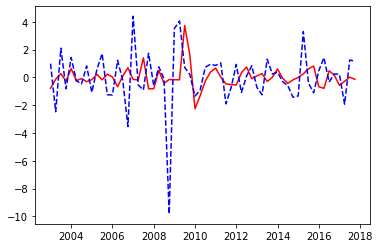

In [68]:
#f
plt.plot(EndOfSample, forecast_data["forecasts"], 'r',EndOfSample, forecast_data["dinfl"], '--b')
plt.show()

In [69]:
forecast_data[["PSOSSFc"]].describe()

,PSOSSFc
count,60.000000
mean,0.011332
std,2.102861
min,-9.669635
25%,-1.088238
50%,0.136901
75%,1.138750
max,4.545522


In [70]:
#####